In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

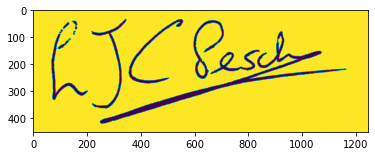

In [2]:
img = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00301001.png')
plt.imshow(img)

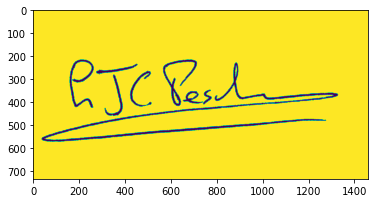

In [3]:
img1 = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [4]:
import glob
gen = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [5]:
import cv2

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [6]:
train_data.shape

(540, 224, 224, 3)

In [7]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

# CNN (CONVOLUTION NEURAL NETWORK)

### Relu Activation Function

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def objective(x, y):
 return x**2.0 + y**2.0


network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3)) #143

network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [9]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3
513/513 [==============================] - 2s 3ms/step - loss: 7.6548 - accuracy: 0.4971 - val_loss: 7.6702 - val_accuracy: 0.5185
Epoch 2/3
513/513 [==============================] - 1s 3ms/step - loss: 7.6684 - accuracy: 0.4990 - val_loss: 7.6702 - val_accuracy: 0.5185
Epoch 3/3
513/513 [==============================] - 1s 3ms/step - loss: 7.6684 - accuracy: 0.4990 - val_loss: 7.6702 - val_accuracy: 0.5185


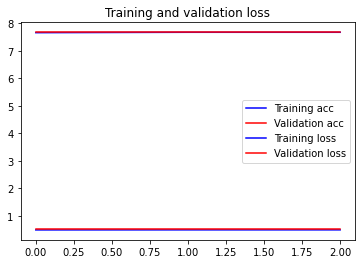

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [11]:
pred = network.predict(test_data)

In [12]:
pred  #prob of genuine, prob of forged

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

### SIGMOID ACTIVATION FUNCTION

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='sigmoid'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='sigmoid'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'sigmoid'))
network.add(Dropout(rate=0.3)) #143

network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3
513/513 [==============================] - 2s 3ms/step - loss: 0.8266 - accuracy: 0.4951 - val_loss: 0.6948 - val_accuracy: 0.4815
Epoch 2/3
513/513 [==============================] - 2s 3ms/step - loss: 0.7251 - accuracy: 0.5127 - val_loss: 0.6975 - val_accuracy: 0.4815
Epoch 3/3
513/513 [==============================] - 2s 3ms/step - loss: 0.7024 - accuracy: 0.5127 - val_loss: 0.6931 - val_accuracy: 0.5185


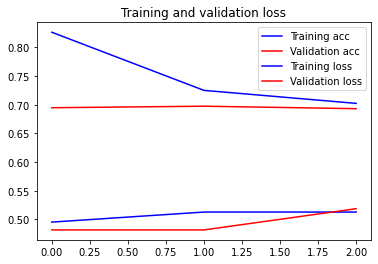

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [17]:
pred = network.predict(test_data)

In [18]:
pred  #prob of genuine, prob of forged

array([[0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [0.4992809, 0.5007191],
       [

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

### TANH ACTIVATION FUNCTION

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='tanh'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='tanh'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'tanh'))
network.add(Dropout(rate=0.3)) #143

network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [21]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 4
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/4
513/513 [==============================] - 2s 3ms/step - loss: 0.9894 - accuracy: 0.4776 - val_loss: 0.6980 - val_accuracy: 0.4815
Epoch 2/4
513/513 [==============================] - 2s 3ms/step - loss: 0.8046 - accuracy: 0.5439 - val_loss: 0.7021 - val_accuracy: 0.5185
Epoch 3/4
513/513 [==============================] - 2s 3ms/step - loss: 0.7552 - accuracy: 0.4542 - val_loss: 0.6934 - val_accuracy: 0.5185
Epoch 4/4
513/513 [==============================] - 2s 3ms/step - loss: 0.7246 - accuracy: 0.4542 - val_loss: 0.6946 - val_accuracy: 0.4815


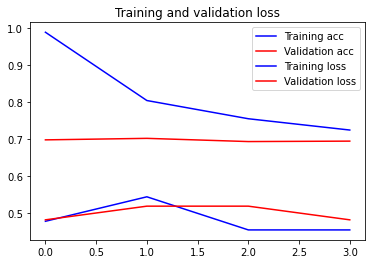

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [23]:
pred = network.predict(test_data)

In [24]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

<hr>

# SIAMESE NEURAL NETWORK

## DISTANCES USED

* Euclidean Distance
* Manhattan Distance
* Hamming Distance
* Minkowski Distance


## **1. Using Euclidean Distance**

## SIGMOID ACTIVATION FUNCTION

In [26]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [27]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 128)          5328800     input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128)          0           functional_1[0][0]    

In [28]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 0s 71ms/step - loss: 0.7302 - accuracy: 0.4500 - val_loss: 0.6937 - val_accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 0s 35ms/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.3000
Epoch 3/10
5/5 [==============================] - 0s 35ms/step - loss: 0.7071 - accuracy: 0.4375 - val_loss: 0.6947 - val_accuracy: 0.3000
Epoch 4/10
5/5 [==============================] - 0s 34ms/step - loss: 0.6954 - accuracy: 0.5125 - val_loss: 0.6951 - val_accuracy: 0.3000
Epoch 5/10
5/5 [==============================] - 0s 36ms/step - loss: 0.7155 - accuracy: 0.3750 - val_loss: 0.6956 - val_accuracy: 0.3000
Epoch 6/10
5/5 [==============================] - 0s 34ms/step - loss: 0.7042 - accuracy: 0.4500 - val_loss: 0.6960 - val_accuracy: 0.3000
Epoch 7/10
5/5 [==============================] - 0s 35ms/step - loss: 0.6919 - accuracy: 0.5625 - val_loss: 0.6966 - val_accuracy: 0.3000
Epoch 8/10
5/5 [===========

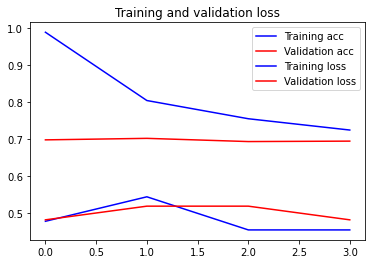

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [30]:
pred = network.predict(test_data)

In [31]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## RELU ACTIVATION FUNCTION 

In [33]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_7 (Functional)       (None, 128)          5328800     input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128)          0           functional_7[0][0]    

In [34]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='relu')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 0s 72ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 31ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 3/10
5/5 [==============================] - 0s 30ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 7/10
5/5 [==============================] - 0s 30ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 8/10
5/5 [===========

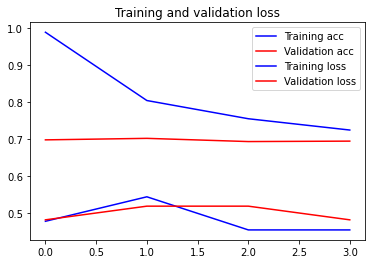

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [35]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [36]:
pred = network.predict(test_data)

In [37]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## **2. Using Manhattan Distance**

## Using RELU Activation Function

In [39]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_13 (Functional)      (None, 128)          5328800     input_12[0][0]                   
                                                                 input_13[0][0]                   
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 128)          0           functional_13[0][0]  

In [40]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def manhattan_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='relu')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(manhattan_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 0s 62ms/step - loss: 7.2434 - accuracy: 0.5250 - val_loss: 9.1495 - val_accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 7.2434 - accuracy: 0.5250 - val_loss: 9.1495 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 7.2434 - accuracy: 0.5250 - val_loss: 9.1495 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 0s 29ms/step - loss: 7.2434 - accuracy: 0.5250 - val_loss: 9.1495 - val_accuracy: 0.4000
Epoch 5/10
5/5 [==============================] - 0s 33ms/step - loss: 7.2434 - accuracy: 0.5250 - val_loss: 9.1495 - val_accuracy: 0.4000
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 7.2434 - accuracy: 0.5250 - val_loss: 9.1495 - val_accuracy: 0.4000
Epoch 7/10
5/5 [==============================] - 0s 30ms/step - loss: 7.2434 - accuracy: 0.5250 - val_loss: 9.1495 - val_accuracy: 0.4000
Epoch 8/10
5/5 [===========

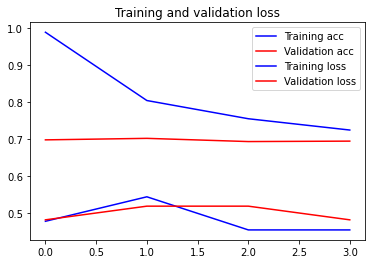

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [42]:
pred = network.predict(test_data)

In [43]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## Using SIGMOID Activation Function

In [45]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='sigmoid')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='sigmoid')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='sigmoid')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_19 (Functional)      (None, 128)          5328800     input_17[0][0]                   
                                                                 input_18[0][0]                   
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 128)          0           functional_19[0][0]  

In [46]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def manhattan_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(manhattan_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 0s 63ms/step - loss: 7.0523 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.7000
Epoch 2/10
5/5 [==============================] - 0s 34ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.7000
Epoch 3/10
5/5 [==============================] - 0s 36ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.7000
Epoch 4/10
5/5 [==============================] - 0s 34ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.7000
Epoch 5/10
5/5 [==============================] - 0s 35ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.7000
Epoch 6/10
5/5 [==============================] - 0s 36ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.7000
Epoch 7/10
5/5 [==============================] - 0s 36ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.7000
Epoch 8/10
5/5 [===========

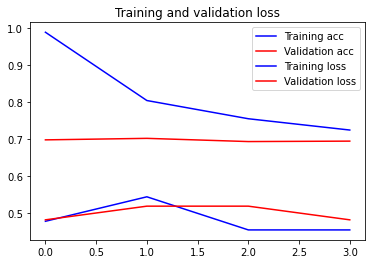

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [47]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [48]:
pred = network.predict(test_data)

In [49]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [50]:
from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_recall_fscore_support
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

In [51]:
from sklearn.metrics import precision_recall_fscore_support

# calculate precision, recall, and F1 score
precision, recall, f1score, _ = precision_recall_fscore_support(test_labels, pred.argmax(axis=1), average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Precision:  0.25
Recall:  0.5
F1 Score:  0.3333333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **3. Using Hamming Distance**

## Using RELU Activation Function

In [52]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_25 (Functional)      (None, 128)          5328800     input_22[0][0]                   
                                                                 input_23[0][0]                   
__________________________________________________________________________________________________
lambda_8 (Lambda)               (None, 128)          0           functional_25[0][0]  

In [53]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
import binascii
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

@tf.function
def hamming_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)

# define the output layer
distance = Lambda(hamming_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
5/5 [==============================] - 0s 67ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 2/10
5/5 [==============================] - 0s 62ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 3/10
5/5 [==============================] - 0s 63ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 4/10
5/5 [==============================] - 0s 62ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 5/10
5/5 [==============================] - 0s 62ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 6/10
5/5 [==============================] - 0s 62ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 7/10
5/5 [==============================] - 0s 62ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 8/10
5/5 [===========

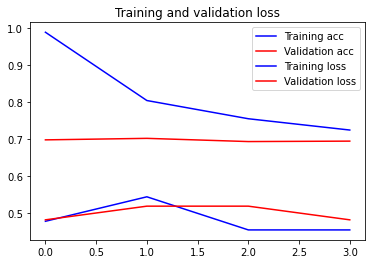

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [54]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [55]:
pred = network.predict(test_data)

In [56]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## Using SIGMOID Activation Function

In [58]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "functional_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_28 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_31 (Functional)      (None, 128)          5328800     input_27[0][0]                   
                                                                 input_28[0][0]                   
__________________________________________________________________________________________________
lambda_10 (Lambda)              (None, 128)          0           functional_31[0][0]  

In [59]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
import binascii
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

@tf.function
def hamming_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)

# define the output layer
distance = Lambda(hamming_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 0s 70ms/step - loss: 7.2833 - accuracy: 0.5250 - val_loss: 2.1493 - val_accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 0s 62ms/step - loss: 7.2833 - accuracy: 0.5250 - val_loss: 2.1493 - val_accuracy: 0.3000
Epoch 3/10
5/5 [==============================] - 0s 62ms/step - loss: 7.2833 - accuracy: 0.5250 - val_loss: 2.1493 - val_accuracy: 0.3000
Epoch 4/10
5/5 [==============================] - 0s 63ms/step - loss: 7.2833 - accuracy: 0.5250 - val_loss: 2.1493 - val_accuracy: 0.3000
Epoch 5/10
5/5 [==============================] - 0s 63ms/step - loss: 7.2833 - accuracy: 0.5250 - val_loss: 2.1493 - val_accuracy: 0.3000
Epoch 6/10
5/5 [==============================] - 0s 63ms/step - loss: 7.2833 - accuracy: 0.5250 - val_loss: 2.1493 - val_accuracy: 0.3000
Epoch 7/10
5/5 [==============================] - 0s 63ms/step - loss: 7.2833 - accuracy: 0.5250 - val_loss: 2.1493 - val_accuracy: 0.3000
Epoch 8/10
5/5 [===========

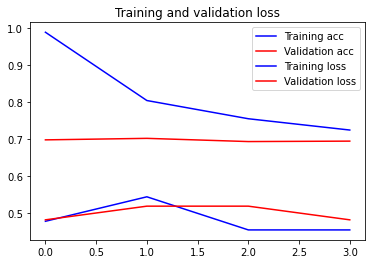

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [61]:
pred = network.predict(test_data)

In [62]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## **4. Using Minkowski Distance**

## Using RELU Activation Function

In [64]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "functional_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_33 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_37 (Functional)      (None, 128)          5328800     input_32[0][0]                   
                                                                 input_33[0][0]                   
__________________________________________________________________________________________________
lambda_12 (Lambda)              (None, 128)          0           functional_37[0][0]  

In [65]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np

# Define the input shape for the network
input_shape = (224, 224, 3)

# Define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# Define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# Create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Define the distance metric function using Minkowski distance
def minkowski_distance(vectors):
    (featsA, featsB) = vectors
    diff = K.abs(featsA - featsB)
    return K.sum(K.pow(diff, 3), axis=-1, keepdims=True)

# Define the output layer
distance = Lambda(minkowski_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# Create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# Train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 0s 68ms/step - loss: 8.0981 - accuracy: 0.4750 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 0s 60ms/step - loss: 8.0981 - accuracy: 0.4750 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 0s 62ms/step - loss: 8.0981 - accuracy: 0.4750 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 0s 61ms/step - loss: 8.0981 - accuracy: 0.4750 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 0s 63ms/step - loss: 8.0981 - accuracy: 0.4750 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 0s 64ms/step - loss: 8.0981 - accuracy: 0.4750 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 0s 61ms/step - loss: 8.0981 - accuracy: 0.4750 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/10
5/5 [===========

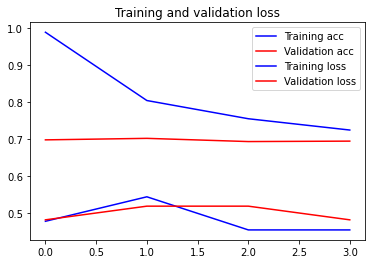

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [66]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [67]:
pred = network.predict(test_data)

In [68]:
pred

array([[0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.52701503, 0.47298497],
       [0.

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

# USING CEDAR DATASET

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/cedardataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cedardataset/signatures/Readme.txt
/kaggle/input/cedardataset/signatures/full_org/original_52_13.png
/kaggle/input/cedardataset/signatures/full_org/original_54_12.png
/kaggle/input/cedardataset/signatures/full_org/original_52_7.png
/kaggle/input/cedardataset/signatures/full_org/original_5_19.png
/kaggle/input/cedardataset/signatures/full_org/original_50_21.png
/kaggle/input/cedardataset/signatures/full_org/original_27_1.png
/kaggle/input/cedardataset/signatures/full_org/original_32_23.png
/kaggle/input/cedardataset/signatures/full_org/original_19_15.png
/kaggle/input/cedardataset/signatures/full_org/original_55_19.png
/kaggle/input/cedardataset/signatures/full_org/original_12_1.png
/kaggle/input/cedardataset/signatures/full_org/original_44_4.png
/kaggle/input/cedardataset/signatures/full_org/original_21_14.png
/kaggle/input/cedardataset/signatures/full_org/original_22_21.png
/kaggle/input/cedardataset/signatures/full_org/original_26_10.png
/kaggle/input/cedardataset/signa

In [71]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Multiply, Subtract, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, Dropout, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

In [72]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform, he_normal
import scipy.misc
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
K.set_image_data_format('channels_last') 
# K.set_learning_phase(1) 
import scipy
import cv2
from keras.layers import subtract
import keras
from keras.layers import Lambda
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam,RMSprop   

In [73]:
from tensorflow import image
from tensorflow.keras.utils import *

In [74]:
from PIL import Image,ImageOps


In [75]:
SIZE=(220,155)

In [76]:
import os
img_path='../input/cedardataset/signatures/full_org/original_11_17.png'

In [77]:
def preprocess(img_input):
    img_input=cv2.resize(img_input,SIZE,interpolation=cv2.INTER_LINEAR )
#     img_input=cv2.bitwise_not(img_input)
    img_input=img_input/245
    return img_input

In [78]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img(img_path,target_size=(155,220)) 
x = img_to_array(img)
x=preprocess(x)

In [79]:
x.shape

(155, 220, 3)

In [80]:
from matplotlib.pyplot import imshow

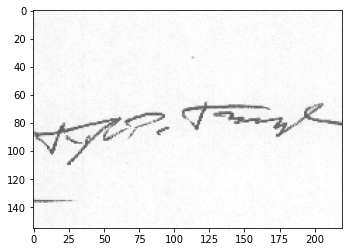

In [81]:
imshow(x)

In [82]:
import os
img_path='../input/cedardataset/signatures/full_org/original_11_17.png'

In [83]:
img = load_img(img_path,target_size=(155,220)) 
x = img_to_array(img)
x=preprocess(x)

In [84]:
x.shape

(155, 220, 3)

In [85]:
from matplotlib.pyplot import imshow

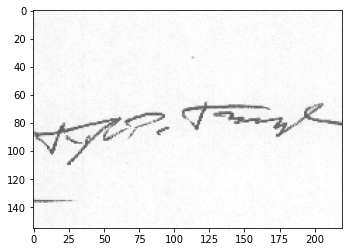

In [86]:
imshow(x)

In [87]:
def euclidian(vects):
    X,y=vects
    return K.sqrt(K.sum(K.square(X-y),axis=1,keepdims=True))

def euclidean_distance_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [88]:
def contrastive_loss(y, preds, margin=1):
	# explicitly cast the true class label data type to the predicted
	# class label data type (otherwise we run the risk of having two
	# separate data types, causing TensorFlow to error out)
	y = tf.cast(y, preds.dtype)
	# calculate the contrastive loss between the true labels and
	# the predicted labels
	squaredPreds = K.square(preds)
	squaredMargin = K.square(K.maximum(margin - preds, 0))
	loss = K.mean(y * squaredPreds + (1 - y) * squaredMargin)
	# return the computed contrastive loss to the calling function
	return loss

In [89]:
input_shape=(155,230,3)

In [90]:
def siamese(input_shape):
    model=Sequential()
    model.add(Conv2D(96, (11,11), activation='relu', name='conv11',input_shape=input_shape))
    model.add(BatchNormalization(epsilon=1e-06,  axis=1, momentum=0.9))
    model.add(MaxPooling2D((3,3), strides=(2, 2),padding='same'))    


    model.add(Conv2D(256, (5,5), activation='relu', name='conv12'))
    model.add(BatchNormalization(epsilon=1e-06,  axis=1, momentum=0.9))
    model.add(MaxPooling2D((3,3), strides=(2, 2),padding='same'))    
    model.add(Dropout(0.3))

    model.add(Conv2D(384, (3,3), activation='relu', name='conv13',input_shape=input_shape,padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', name='conv14'))
    model.add(MaxPooling2D((3,3), strides=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer=glorot_uniform(seed=0)))
    model.add(Dropout(0.3))
    model.add(Dense(128, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer=glorot_uniform(seed=0)))
    return model

In [91]:
apply_sigmodel = siamese((155,220,3))
    
X_input1 = Input(shape=(155,220,3))
X_input2 = Input(shape=(155,220,3)) 

X_vect1 = apply_sigmodel(X_input1)
X_vect2 = apply_sigmodel(X_input2)
    
distance = Lambda(euclidian, output_shape=euclidean_distance_output_shape)([X_vect1,X_vect2])
    
model = Model(inputs=[X_input1,X_input2], outputs=distance)    

In [92]:
rms = RMSprop(learning_rate=1e-4, rho=0.9, epsilon=1e-08)

In [93]:
model.compile(loss=contrastive_loss,optimizer=rms,metrics=['accuracy'])

In [94]:
forg_list_1=[]
for i in range(20):
    p=[]
    for j in range(24):
        img_path = '../input/cedardataset/signatures/full_forg/forgeries_'+str(i+1) +'_' +str(j+1)+'.png'
        img = load_img(img_path,target_size=(155,220)) 
        x = img_to_array(img)
        x=preprocess(x)
        p.append(x)
    forg_list_1.append(p)

In [95]:
org_list_1=[]
for i in range(20):
    p=[]
    for j in range(24):
        img_path = '../input/cedardataset/signatures/full_org/original_'+str(i+1) +'_' +str(j+1)+'.png'
        img = load_img(img_path,target_size=(155,220)) 
        x = img_to_array(img)
        x=preprocess(x)
        p.append(x)
    org_list_1.append(p)

In [96]:
X_train1=[]
X_train2=[]
for i in range(10):
    count=24
    while(count>1):
        for j in range(0,count-1):
            X_train1.append(org_list_1[i][24-count])
            X_train2.append(org_list_1[i][24-count+j+1])
        count=count-1
       
for i in range(10):
    count=24
    while(count>1):
        for j in range(0,count-1):
            X_train1.append(org_list_1[i][24-count])
            X_train2.append(forg_list_1[i][24-count+j+1])
        count=count-1

In [97]:
len(X_train1)

5520

In [98]:
X_train1=np.asarray(X_train1)
X_train2=np.asarray(X_train2)    

In [99]:
12420

12420

In [100]:
Y_train=np.array([])
for m in range(2760):
    Y_train=np.insert(Y_train,0,1)
for n in range(2760):
    Y_train=np.insert(Y_train,0,0)   

In [101]:
model.fit([X_train1,X_train2], Y_train, epochs = 5, batch_size = 10)      

Epoch 1/5
552/552 [==============================] - 88s 159ms/step - loss: 2.9433 - accuracy: 0.5036
Epoch 2/5
552/552 [==============================] - 88s 159ms/step - loss: 0.3184 - accuracy: 0.5031
Epoch 3/5
552/552 [==============================] - 88s 159ms/step - loss: 0.2780 - accuracy: 0.4772
Epoch 4/5
552/552 [==============================] - 88s 159ms/step - loss: 0.2443 - accuracy: 0.3678
Epoch 5/5
552/552 [==============================] - 88s 159ms/step - loss: 0.1682 - accuracy: 0.2306


In [102]:
import h5py
model.save_weights('model_weights33.h5') 

In [103]:
del X_train1, X_train2

In [104]:
img_1=load_img('../input/cedardataset/signatures/full_forg/forgeries_20_10.png',target_size=(155,220)) 
x = img_to_array(img_1)
x=preprocess(x)
l1=[x]
# l2=[x2]
l1=np.asarray(l1)
# l2=np.asarray(l2)

In [105]:
l1=[x]
# l2=[x2]
l1=np.asarray(l1)

In [106]:
img_1=load_img('../input/cedardataset/signatures/full_org/original_20_10.png',target_size=(155,220)) 
x = img_to_array(img_1)
x=preprocess(x)

In [107]:
l2=[x]
l2=np.asarray(l2)

In [108]:
pred=model.predict([l1,l2])

In [109]:
pred

array([[0.2479576]], dtype=float32)

In [110]:
from sklearn.metrics import accuracy_score

# get predictions on test data
pred = model.predict([l1, l2])
pred = pred.reshape(-1)  # flatten to a 1D array

# convert distances to similarities
similarity = 1/(1+pred)

# set a threshold to convert similarities to class predictions
threshold = 0.5
predictions = (similarity > threshold).astype(int)

# calculate accuracy
y_true = [1]  # replace with the actual labels of the samples
accuracy = accuracy_score(y_true, predictions)
print('Accuracy:', accuracy)


Accuracy: 1.0


# ICDAR DATASET

In [111]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# define input shape for the network
input_shape = (224, 224, 3)

# create a sequential model
model = Sequential()

# add convolutional layers with pooling and dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# flatten the output and add dense layers with dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# print the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 186624)          

In [112]:
from keras.preprocessing.image import ImageDataGenerator

# define the directories for the real and forged signatures
real_dir = '/kaggle/input/handwritten-signature-verification/data/data/real'
forged_dir = '/kaggle/input/handwritten-signature-verification/data/data/forged'

# create an image data generator with augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# create an image data generator without augmentation for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# create flow generators for the training and validation data
train_generator = train_datagen.flow_from_directory(
    real_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    forged_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')


Found 2913 images belonging to 272 classes.
Found 2735 images belonging to 252 classes.


In [113]:
# train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)


Epoch 1/10
100/100 [==============================] - 21s 215ms/step - loss: -2016.4697 - accuracy: 0.0044 - val_loss: -1903.3149 - val_accuracy: 0.0037
Epoch 2/10
100/100 [==============================] - 21s 210ms/step - loss: -2069.9778 - accuracy: 0.0019 - val_loss: -1945.5197 - val_accuracy: 0.0050
Epoch 3/10
100/100 [==============================] - 20s 197ms/step - loss: -2037.8933 - accuracy: 0.0031 - val_loss: -1940.3828 - val_accuracy: 0.0113
Epoch 4/10
100/100 [==============================] - 19s 191ms/step - loss: -2061.5249 - accuracy: 0.0019 - val_loss: -1858.4652 - val_accuracy: 0.0075
Epoch 5/10
100/100 [==============================] - 20s 196ms/step - loss: -2060.7676 - accuracy: 0.0050 - val_loss: -1934.3647 - val_accuracy: 0.0075
Epoch 6/10
100/100 [==============================] - 19s 187ms/step - loss: -2036.5153 - accuracy: 0.0044 - val_loss: -1932.1989 - val_accuracy: 0.0075
Epoch 7/10
100/100 [==============================] - 19s 191ms/step - loss: -2044

In [114]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the paths to the real and forged signature images
real_path = '/kaggle/input/handwritten-signature-verification/data/data/real'
forged_path = '/kaggle/input/handwritten-signature-verification/data/data/forged'

# Load the real signature images
real_images = []
for filename in os.listdir(real_path):
    image = cv2.imread(os.path.join(real_path, filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        real_images.append(image)

# Load the forged signature images
forged_images = []
for filename in os.listdir(forged_path):
    image = cv2.imread(os.path.join(forged_path, filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        forged_images.append(image)

# Convert the images to numpy arrays
real_images = np.array(real_images)
forged_images = np.array(forged_images)

# Create the labels (0 for real, 1 for forged)
real_labels = np.zeros((real_images.shape[0], 1))
forged_labels = np.ones((forged_images.shape[0], 1))

# Concatenate the real and forged images and labels
images = np.concatenate((real_images, forged_images))
labels = np.concatenate((real_labels, forged_labels))

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images.reshape((-1, 224, 224, 1)), train_labels, batch_size=32, epochs=10, validation_data=(val_images.reshape((-1, 224, 224, 1)), val_labels))

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_images.reshape((-1, 224, 224, 1)), val_labels)
print('Validation accuracy:', accuracy)


Epoch 1/10
14/14 [==============================] - 1s 86ms/step - loss: 6.9570 - accuracy: 0.5167 - val_loss: 7.1983 - val_accuracy: 0.5333
Epoch 2/10
14/14 [==============================] - 1s 57ms/step - loss: 7.3435 - accuracy: 0.5239 - val_loss: 7.1983 - val_accuracy: 0.5333
Epoch 3/10
14/14 [==============================] - 1s 56ms/step - loss: 7.3435 - accuracy: 0.5239 - val_loss: 7.1983 - val_accuracy: 0.5333
Epoch 4/10
14/14 [==============================] - 1s 53ms/step - loss: 7.3435 - accuracy: 0.5239 - val_loss: 7.1983 - val_accuracy: 0.5333
Epoch 5/10
14/14 [==============================] - 1s 57ms/step - loss: 7.3435 - accuracy: 0.5239 - val_loss: 7.1983 - val_accuracy: 0.5333
Epoch 6/10
14/14 [==============================] - 1s 54ms/step - loss: 7.3435 - accuracy: 0.5239 - val_loss: 7.1983 - val_accuracy: 0.5333
Epoch 7/10
14/14 [==============================] - 1s 53ms/step - loss: 7.3435 - accuracy: 0.5239 - val_loss: 7.1983 - val_accuracy: 0.5333
Epoch 8/10
14

4/4 [==============================] - 0s 15ms/step - loss: 7.1983 - accuracy: 0.5333
Validation accuracy: 0.5333333611488342


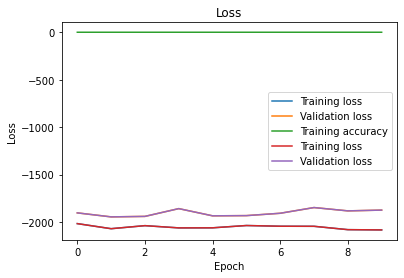

In [115]:
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_images.reshape((-1, 224, 224, 1)), val_labels)
print('Validation accuracy:', val_acc)

# Plot the loss and accuracy over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

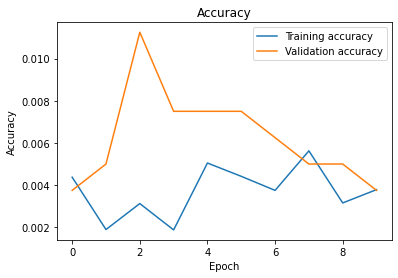

In [116]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()